# About

This project is based on the dataset available at https://www.kaggle.com/ashkhagan/smile-twitter-emotion-dataset?select=smile-annotations-final.csv which is composed of about 3k tweets.

# Importing Req. Libraries

In [1]:
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
print('Importing Done')

C:\Users\Hrishita\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Importing Done


# Data Importing 

In [19]:
import pandas as pd
tdata = pd.read_csv("https://raw.githubusercontent.com/Dataminimgproject/dataminingassignment/main/smileannotationsfinal%20(1).csv",
                   names=["key","tweet","status"])

tdata

,key,tweet,status
0,611857364396965889,@aandraous @britishmuseum @AndrewsAntonio Merc...,nocode
1,614484565059596288,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy
2,614746522043973632,@SelectShowcase @Tate_StIves ... Replace with ...,happy
3,614877582664835073,@Sofabsports thank you for following me back. ...,happy
4,611932373039644672,@britishmuseum @TudorHistory What a beautiful ...,happy
...,...,...,...
3080,613678555935973376,MT @AliHaggett: Looking forward to our public ...,happy
3081,613294681225621504,@britishmuseum Upper arm guard?,nocode
3082,615246897670922240,@MrStuchbery @britishmuseum Mesmerising.,happy
3083,613016084371914753,@NationalGallery The 2nd GENOCIDE against #Bia...,not-relevant


Unwanted column removed

In [20]:
tdata=tdata.iloc[:,1:]
tdata

,tweet,status
0,@aandraous @britishmuseum @AndrewsAntonio Merc...,nocode
1,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy
2,@SelectShowcase @Tate_StIves ... Replace with ...,happy
3,@Sofabsports thank you for following me back. ...,happy
4,@britishmuseum @TudorHistory What a beautiful ...,happy
...,...,...
3080,MT @AliHaggett: Looking forward to our public ...,happy
3081,@britishmuseum Upper arm guard?,nocode
3082,@MrStuchbery @britishmuseum Mesmerising.,happy
3083,@NationalGallery The 2nd GENOCIDE against #Bia...,not-relevant


Count of each class label

In [21]:
tdata.status.value_counts()

nocode               1572
happy                1137
not-relevant          214
angry                  57
surprise               35
sad                    32
happy|surprise         11
happy|sad               9
disgust|angry           7
disgust                 6
sad|disgust             2
sad|angry               2
sad|disgust|angry       1
Name: status, dtype: int64

# Data Preprocessing

Removing null/irrelevant values

In [22]:
tdata.drop(tdata[tdata['status']=='nocode'].index,inplace=True)
tdata.drop(tdata[tdata['status']=='not-relevant'].index,inplace=True)
tdata

,tweet,status
1,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy
2,@SelectShowcase @Tate_StIves ... Replace with ...,happy
3,@Sofabsports thank you for following me back. ...,happy
4,@britishmuseum @TudorHistory What a beautiful ...,happy
5,@NationalGallery @ThePoldarkian I have always ...,happy
...,...,...
3076,Good to see @liveatlica's art collection @Leed...,happy
3077,"@RAMMuseum thanks, we'll have a look next week...",happy
3079,“@britishmuseum: Thanks for ranking us #1 in @...,happy
3080,MT @AliHaggett: Looking forward to our public ...,happy


In [23]:
tdata.status.value_counts()

happy                1137
angry                  57
surprise               35
sad                    32
happy|surprise         11
happy|sad               9
disgust|angry           7
disgust                 6
sad|disgust             2
sad|angry               2
sad|disgust|angry       1
Name: status, dtype: int64

# Data Visualisation

Visualising count of lables 

<AxesSubplot:ylabel='status'>

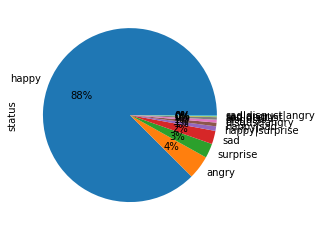

In [24]:
import matplotlib.pyplot as plt

tdata.status.value_counts().plot(kind='pie',autopct='%1.0f%%')

It can be clearly observed that the dataset is biased towards "happy" label.

<AxesSubplot:>

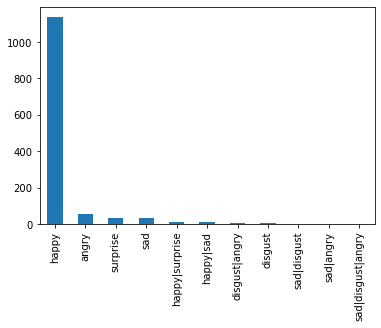

In [25]:
import matplotlib.pyplot as plt

tdata.status.value_counts().plot(kind='bar')

# Data Cleaning

Steps Involved:-
Remove URLs from the tweets,
Tokenize text,
Remove emails,
Remove new lines characters,
Remove distracting single quotes,
Remove all punctuation signs,
Lowercase all text,
Detokenize text,
Convert list of texts to Numpy array.

In [26]:
def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data

In [27]:
temp = []
#Splitting pd.Series to list
data_to_list = tdata['tweet'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
list(temp[:5])

['Dorian Gray with Rainbow Scarf #LoveWins (from ',
 '... Replace with your wish which the artist uses in next installation! It was entralling!',
 'thank you for following me back. Great to hear from a diverse &amp; interesting panel #DefeatingDepression ',
 'What a beautiful jewel / portrait. Is the R for Rex ?',
 'I have always loved this painting.']

In [28]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        

data_words = list(sent_to_words(temp))

print(data_words[:10])

[['dorian', 'gray', 'with', 'rainbow', 'scarf', 'lovewins', 'from'], ['replace', 'with', 'your', 'wish', 'which', 'the', 'artist', 'uses', 'in', 'next', 'installation', 'it', 'was', 'entralling'], ['thank', 'you', 'for', 'following', 'me', 'back', 'great', 'to', 'hear', 'from', 'diverse', 'amp', 'interesting', 'panel'], ['what', 'beautiful', 'jewel', 'portrait', 'is', 'the', 'for', 'rex'], ['have', 'always', 'loved', 'this', 'painting'], ['lucky', 'good', 'luck', 'amp', 'see', 'you', 'soon'], ['yr', 'art', 'students', 'are', 'off', 'to', 'the', 'today', 'enjoy'], ['so', 'beautiful'], ['awesome', 'museum'], ['askthegallery', 'why', 'do', 'you', 'pay', 'your', 'brilliant', 'staff', 'so', 'poorly']]


In [29]:
len(data_words)

1299

In [30]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [31]:
data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['dorian gray with rainbow scarf lovewins from', 'replace with your wish which the artist uses in next installation it was entralling', 'thank you for following me back great to hear from diverse amp interesting panel', 'what beautiful jewel portrait is the for rex', 'have always loved this painting']


In [32]:
tdata.status.value_counts()

happy                1137
angry                  57
surprise               35
sad                    32
happy|surprise         11
happy|sad               9
disgust|angry           7
disgust                 6
sad|disgust             2
sad|angry               2
sad|disgust|angry       1
Name: status, dtype: int64

# Label Encoding 

In [91]:
tdata=tdata.replace('happy|surprise','happy')
tdata=tdata.replace('happy|sad','happy')
tdata=tdata.replace('sad|disgust','sad')
tdata=tdata.replace('sad|disgust|angry','sad')
tdata=tdata.replace('sad|angry','sad')
tdata=tdata.replace('disgust|angry','disgust')
tdata.status.value_counts()
status=tdata.iloc[:,1].values
status

array(['happy', 'happy', 'happy', ..., 'happy', 'happy', 'happy'],
      dtype=object)

In [92]:
tdata.status.value_counts()

happy       1157
angry         57
sad           44
surprise      35
disgust        6
Name: status, dtype: int64

In [93]:
data = np.array(data)

In [94]:
labels = np.array(tdata['status'])
y = []
for i in range(len(labels)):
    if labels[i] == 'happy':
        y.append(0)
    if labels[i] == 'angry':
        y.append(1)
    if labels[i] == 'sad':
        y.append(2)
    if labels[i] == 'surprise':
        y.append(3)
    if labels[i] == 'disgust':
        y.append(4)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 5, dtype="float32")
del y

In [95]:
len(labels)

1299

# Data Sequencing and Splitting 

Implementation of the Keras tokenizer as well as its pad_sequences method to transform text data into 3D float data, otherwise neural networks won't be able to be trained on it.

In [96]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ... 1239  580   19]
 [   0    0    0 ...   15   33 1242]
 [   0    0    0 ...   12  105  382]
 ...
 [   0    0    0 ...  131    4   48]
 [   0    0    0 ... 1029  108  151]
 [   0    0    0 ...    0    0 3320]]


In [97]:
print(labels)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [98]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

974 325 974 325


# Model Building

I have implemented sequential models from the Keras API to achieve this task. Essentially, I'll start with a single layer LSTM network which is known by achieving good results in NLP tasks when the dataset is relatively small. The next one will be a Bidirectional LSTM model, a more complex one and this particular one is known to achieve great metrics when talking about text classification.

# Single LSTM layer model

In [99]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(5,activation='softmax'))


model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/70
31/31 [==============================] - 11s 141ms/step - loss: 1.4752 - accuracy: 0.7569 - val_loss: 0.7568 - val_accuracy: 0.8708

Epoch 00001: val_accuracy improved from -inf to 0.87077, saving model to best_model1.hdf5
Epoch 2/70
31/31 [==============================] - 3s 104ms/step - loss: 0.6281 - accuracy: 0.8876 - val_loss: 0.5705 - val_accuracy: 0.8708

Epoch 00002: val_accuracy did not improve from 0.87077
Epoch 3/70
31/31 [==============================] - 3s 101ms/step - loss: 0.4635 - accuracy: 0.9020 - val_loss: 0.5568 - val_accuracy: 0.8708

Epoch 00003: val_accuracy did not improve from 0.87077
Epoch 4/70
31/31 [==============================] - 4s 113ms/step - loss: 0.4629 - accuracy: 0.8956 - val_loss: 0.5498 - val_accuracy: 0.8708

Epoch 00004: val_accuracy did not improve from 0.87077
Epoch 5/70
31/31 [==============================] - 3s 112ms/step - loss: 0.4156 - accuracy: 0.9062 - val_loss: 0.5406 - val_accuracy: 0.8708

Epoch 00005: val_accuracy did

# Bidirectional LSTM model

In [100]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(5,activation='softmax'))
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/70
31/31 [==============================] - 15s 192ms/step - loss: 1.1699 - accuracy: 0.7558 - val_loss: 0.5495 - val_accuracy: 0.8708

Epoch 00001: val_accuracy improved from -inf to 0.87077, saving model to best_model2.hdf5
Epoch 2/70
31/31 [==============================] - 4s 125ms/step - loss: 0.4006 - accuracy: 0.9146 - val_loss: 0.5454 - val_accuracy: 0.8708

Epoch 00002: val_accuracy did not improve from 0.87077
Epoch 3/70
31/31 [==============================] - 4s 124ms/step - loss: 0.4599 - accuracy: 0.8941 - val_loss: 0.5384 - val_accuracy: 0.8708

Epoch 00003: val_accuracy did not improve from 0.87077
Epoch 4/70
31/31 [==============================] - 4s 125ms/step - loss: 0.3797 - accuracy: 0.9098 - val_loss: 0.5228 - val_accuracy: 0.8708

Epoch 00004: val_accuracy did not improve from 0.87077
Epoch 5/70
31/31 [==============================] - 4s 126ms/step - loss: 0.4012 - accuracy: 0.8959 - val_loss: 0.4872 - val_accuracy: 0.8708

Epoch 00005: val_accuracy did

# Best Model Validation

In [101]:
#loading the best model obtained during training
best_model = keras.models.load_model("best_model1.hdf5")

In [102]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy(%):',test_acc*100)

11/11 - 1s - loss: 0.4197 - accuracy: 0.8985
Model accuracy(%): 89.84615206718445


In [103]:
predictions = best_model.predict(X_test)
predictions

array([[9.9879992e-01, 5.6788074e-05, 6.1267137e-04, 4.9092650e-04,
        3.9599236e-05],
       [8.6774904e-01, 2.0973973e-02, 6.0802851e-02, 4.2239949e-02,
        8.2341116e-03],
       [9.9859351e-01, 7.4456919e-05, 7.2056329e-04, 5.6185428e-04,
        4.9665505e-05],
       ...,
       [9.8503464e-01, 1.6498782e-03, 8.7729720e-03, 3.8528165e-03,
        6.8976410e-04],
       [9.9832565e-01, 8.3564984e-05, 8.2850450e-04, 7.0508831e-04,
        5.7115201e-05],
       [9.8492658e-01, 9.8994246e-04, 8.0349194e-03, 5.4168040e-03,
        6.3179160e-04]], dtype=float32)

# Confusion Matrix

As the accuracy is not a good metric to measure how well a model is. That's the reason why we seek its confusion matrix, that way we have a better understanding of its classification and generalization ability. 
I have done the same thing here ;)

In [104]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(best_model.predict(X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))
print(classification_report(y_test_arg, Y_pred))
print("Accuracy Score:" ,accuracy_score(y_test_arg, Y_pred))

Confusion Matrix
[[280   1   2   0   0]
 [  4  10   1   0   0]
 [  7   1   2   0   0]
 [ 14   1   0   0   0]
 [  1   1   0   0   0]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       283
           1       0.71      0.67      0.69        15
           2       0.40      0.20      0.27        10
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00         2

    accuracy                           0.90       325
   macro avg       0.41      0.37      0.38       325
weighted avg       0.84      0.90      0.87       325

Accuracy Score: 0.8984615384615384


In [105]:
matx=confusion_matrix(y_test_arg, Y_pred)

<AxesSubplot:>

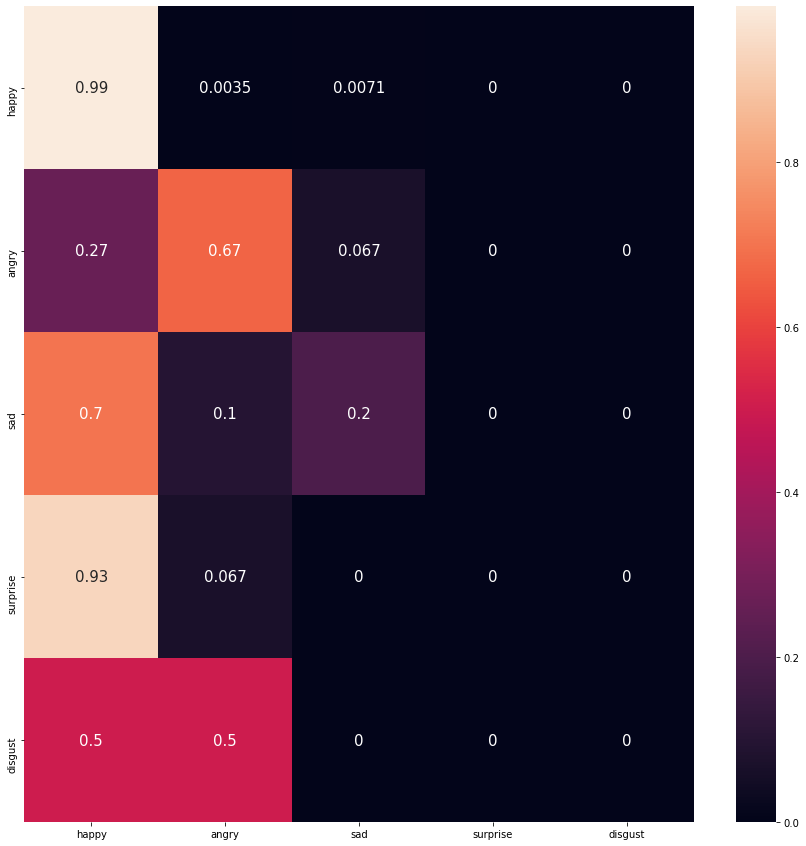

In [106]:
import seaborn as sns
conf_matrix = pd.DataFrame(matx, index = ['happy','angry','sad','surprise','disgust'],columns = ['happy','angry','sad','surprise','disgust'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

I know my model's score is very poor, but it hasn't gone through hyperparameter tuning, so it's alright. Let's see how it performs on some test text.

# Prediction 

In [107]:
sentiment = ['happy','angry','sad','surprise','disgust']

In [113]:
sequence = tokenizer.texts_to_sequences(["dorian gray with rainbow scarf lovewins from"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'happy'